In [1]:
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np


Populating the interactive namespace from numpy and matplotlib


In [2]:
bechdelDataset = pd.read_csv('/Users/manavdutta1/Downloads/DataScienceIntensive/MilestoneReport/mergedWithRevenue.csv', encoding='latin_1')

In [3]:
cpiData = pd.read_csv('/Users/manavdutta1/Downloads/DataScienceIntensive/MilestoneReport/cpi.csv')
cpiData.head()

,Year,Avg
0,1913,9.9
1,1914,10.0
2,1915,10.1
3,1916,10.9
4,1917,12.8


In [4]:
#Lets fill in columns based on rating
for i in range(len(bechdelDataset)):
    rating = bechdelDataset.iloc[i]['Rating']
    if (rating == 0):
        bechdelDataset.set_value(i, 'binary', 'FAIL')
        bechdelDataset.set_value(i, 'test', 'nowomen')
        bechdelDataset.set_value(i, 'clean_test', 'nowomen')
    if (rating == 1):
        bechdelDataset.set_value(i, 'binary', 'FAIL')
        bechdelDataset.set_value(i, 'test', 'notalk')
        bechdelDataset.set_value(i, 'clean_test', 'notalk')
    if (rating == 2):
        bechdelDataset.set_value(i, 'binary', 'FAIL')
        bechdelDataset.set_value(i, 'test', 'men')
        bechdelDataset.set_value(i, 'clean_test', 'men')
    if (rating == 3):
        bechdelDataset.set_value(i, 'binary', 'PASS')
        bechdelDataset.set_value(i, 'test', 'ok')
        bechdelDataset.set_value(i, 'clean_test', 'ok')
            

            

In [7]:
#And adjust box office revenue data by the cpi data too
from decimal import Decimal
from re import sub

baseCPI = cpiData[cpiData['Year'] == 2013]['Avg']

In [8]:
for i in range(len(bechdelDataset)):
    internationalGross = bechdelDataset.iloc[i]['intgross_2013$']
    domGross = bechdelDataset.iloc[i]['domgross_2013$']
    if (pd.notnull(internationalGross) and pd.notnull(domGross)):
        bechdelDataset.set_value(i,'adjusted_box_office', internationalGross + domGross)
    else:
        if (pd.notnull(bechdelDataset.iloc[i]['box_office'])):
            boxOfficeVal = Decimal(sub(r'[^\d.]', '', bechdelDataset.iloc[i]['box_office']))
            yearMovie = bechdelDataset.iloc[i]['Year']
            yearVal = cpiData[cpiData.Year == yearMovie]['Avg'][yearMovie - 1913]
            bechdelDataset.set_value(i, 'adjusted_box_office', (yearVal/(1.0 * baseCPI)) * float(boxOfficeVal))

In [9]:
bechdelDataset.columns.values
bechdelDataset.to_csv('/Users/manavdutta1/Downloads/DataScienceIntensive/MilestoneReport/mergeWithRevenue.csv')

In [10]:
#Let us start with trend analysis

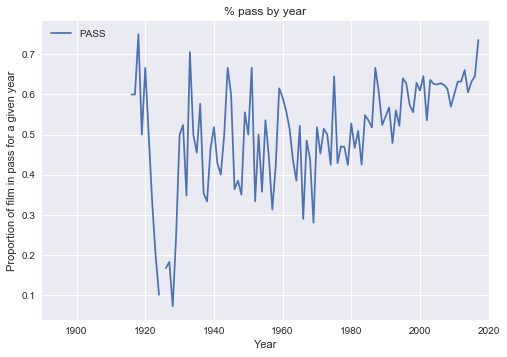

In [18]:
bechdelDataset.groupby(['binary', 'clean_test']).size()
mergedSet = bechdelDataset.groupby(['Year', 'binary']).size()
mergedSet = mergedSet.unstack('binary')
plt.figure()
ax = ((mergedSet.PASS)/(mergedSet.PASS+mergedSet.FAIL)).plot(xlim=[1890, 2020], title='% pass by year')
                                                             
ax.legend(labels=['PASS'], loc='best')
ax.set_ylabel("Proportion of film in pass for a given year")

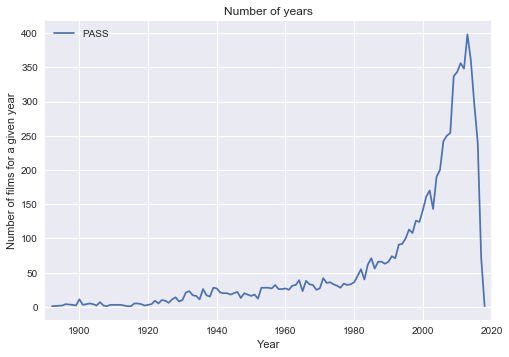

In [19]:
bechdelYears = bechdelDataset.groupby(['Year']).size()
ax = bechdelYears.plot(xlim=[1890, 2020], title='Number of years')
                                                             
ax.legend(labels=['PASS'], loc='best')
ax.set_ylabel("Number of films for a given year")